# Classification

Classification is an supervised learning, to build a model according to test data, and the target is to predict a variable which is categorical.

## Prepare Data

The dataset we use is from [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/seeds), the wheat seeds data set. The data comes from 3 kinds of wheat. Seven geometric parameters of wheat kernels were measured:

1. area $A$,
2. perimeter $P$,
3. compactness $C = 4*\pi*A/P^2$,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
8. groups

All of these parameters were real-valued continuous. We can see that column 3 data is not an independant data, is it fully dependant on column 1 and column 2. Thus in model developping we can ignore column 3 first.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn')
plt.rcParams.update({'figure.figsize': (12,6),\
                     'figure.titlesize':16,\
                     'axes.titlesize':16,\
                     'axes.labelsize':14,\
                     'xtick.labelsize':14,\
                     'ytick.labelsize':14,
                    })

In [3]:
import pathlib

file_path = pathlib.Path('D:/Edu/data_resource/data-UCI ml/seeds_dataset.txt')

df_seeds = pd.read_csv(file_path, delim_whitespace=True, names=['A', 'P', 'C', 'lkern', 'wkern', 'asym', 'lgro', 'gr'])
df_seeds

,A,P,C,lkern,wkern,asym,lgro,gr
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [4]:
df_seeds['C1'] = 4*np.pi*df_seeds['A']/(df_seeds['P']**2)
df_seeds

,A,P,C,lkern,wkern,asym,lgro,gr,C1
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,0.870756
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,0.880833
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,0.904524
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,0.894995
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,0.902631
...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,0.879156
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,0.850664
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,0.888960
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,0.852621


In [5]:
df_seeds.dtypes

A        float64
P        float64
C        float64
lkern    float64
wkern    float64
asym     float64
lgro     float64
gr         int64
C1       float64
dtype: object

In [6]:
df_seeds.isna().any()

A        False
P        False
C        False
lkern    False
wkern    False
asym     False
lgro     False
gr       False
C1       False
dtype: bool

In [7]:
gr1 = df_seeds['gr']==1
gr2 = df_seeds['gr']==2
gr3 = df_seeds['gr']==3
gr1

0       True
1       True
2       True
3       True
4       True
       ...  
205    False
206    False
207    False
208    False
209    False
Name: gr, Length: 210, dtype: bool

In [8]:
type(gr1)

pandas.core.series.Series

In [9]:
features = df_seeds.columns.drop(['C','C1','gr'])
features

Index(['A', 'P', 'lkern', 'wkern', 'asym', 'lgro'], dtype='object')

In [10]:
def plot_style_adjust(axes):
    for ax in axes.flatten():
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

        ax.grid()

        ax.locator_params(axis='x', nbins=5)
        ax.xaxis.set_major_formatter('{x:.1f}')
        ax.xaxis.set_minor_locator(AutoMinorLocator(5))
        ax.yaxis.set_major_locator(MultipleLocator(5))
        ax.yaxis.set_minor_locator(AutoMinorLocator(5))
        ax.tick_params(which='both', width=2)
        ax.tick_params(which='major', length=7)
        ax.tick_params(which='minor', length=4, color='r')
        
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

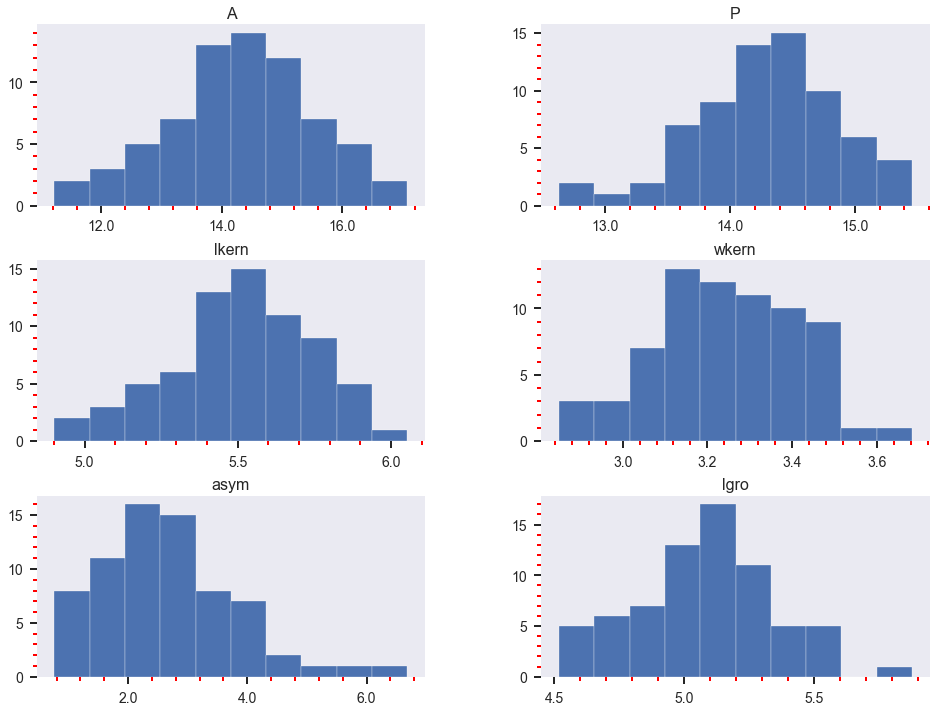

In [11]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig, axes = plt.subplots(3,2,figsize=(16,12))
axes = df_seeds[features][gr1].hist(ax=axes, ec='white')
plot_style_adjust(axes)
plt.show()

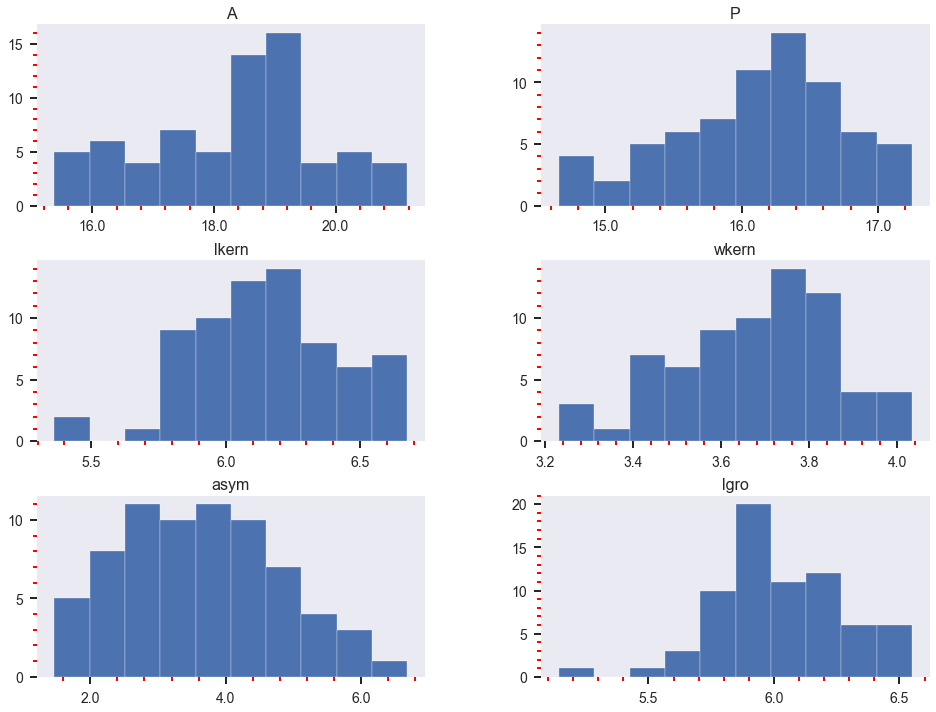

In [12]:
fig, axes = plt.subplots(3,2,figsize=(16,12))
axes = df_seeds[features][gr2].hist(ax=axes, ec='white')
plot_style_adjust(axes)
plt.show()

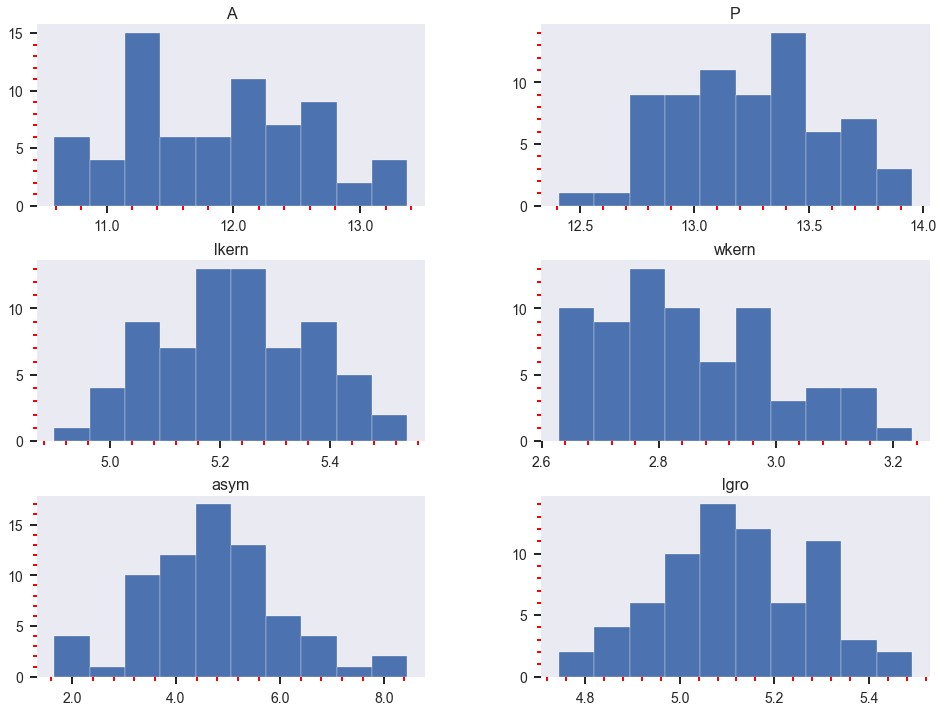

In [13]:
fig, axes = plt.subplots(3,2,figsize=(16,12))
axes = df_seeds[features][gr3].hist(ax=axes, ec='white')
plot_style_adjust(axes)
plt.show()

If check different group's distribution, Maybe we can find that the 'lgro', and 'wkern', these 2 features seems distribution quite different for the 3 groups.

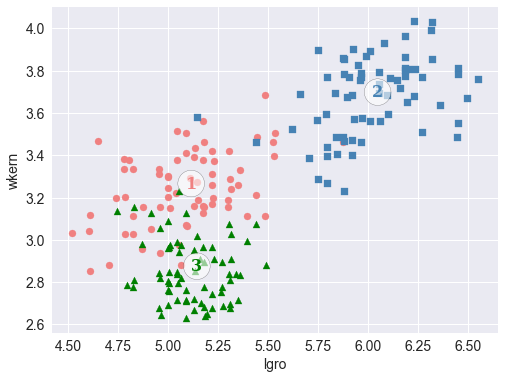

In [14]:
fig, ax = plt.subplots(1, figsize=(8,6))
ax.scatter(df_seeds['lgro'][gr1], df_seeds['wkern'][gr1], color='lightcoral', marker='o')
ax.scatter(df_seeds['lgro'][gr2], df_seeds['wkern'][gr2], color='steelblue', marker='s')
ax.scatter(df_seeds['lgro'][gr3], df_seeds['wkern'][gr3], color='green', marker='^')
font=dict(size=16,family='serif',weight='bold',style='normal',color='lightcoral')
box=dict(fc='w',ec='k',alpha=0.6,boxstyle='circle')
ax.text(df_seeds['lgro'][gr1].mean(), df_seeds['wkern'][gr1].mean(), '1', fontdict=font, bbox=box)
font['color']='steelblue'
ax.text(df_seeds['lgro'][gr2].mean(), df_seeds['wkern'][gr2].mean(), '2', fontdict=font, bbox=box)
font['color']='green'
ax.text(df_seeds['lgro'][gr3].mean(), df_seeds['wkern'][gr3].mean(), '3', fontdict=font, bbox=box)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_xlabel('lgro')
ax.set_ylabel('wkern')
plt.show()

## Classification, K-nearest neighbor  
The algorithms of K-nearest neighbors, is done by majority votes. This algorithms does not build any model when fitting data. Only when doing prediction the calculation is done. When predicting, the algorithms takes K nearest neighbor points in features space, and based one the majority to select the label for the point to be predicted.
![KNN](600px-KnnClassification.png)  
For the number K in K-nearest neighbor, we can decide by running with different K number, and choose the one with least validation error rate.  
![validation error rate](600px-validation-error.png)

In [15]:
df_seeds[features]

,A,P,lkern,wkern,asym,lgro
0,15.26,14.84,5.763,3.312,2.221,5.220
1,14.88,14.57,5.554,3.333,1.018,4.956
2,14.29,14.09,5.291,3.337,2.699,4.825
3,13.84,13.94,5.324,3.379,2.259,4.805
4,16.14,14.99,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...
205,12.19,13.20,5.137,2.981,3.631,4.870
206,11.23,12.88,5.140,2.795,4.325,5.003
207,13.20,13.66,5.236,3.232,8.315,5.056
208,11.84,13.21,5.175,2.836,3.598,5.044


In [16]:
df_seeds[features].std()

A        2.909699
P        1.305959
lkern    0.443063
wkern    0.377714
asym     1.503557
lgro     0.491480
dtype: float64

In [17]:
df_seeds[features].mean()

A        14.847524
P        14.559286
lkern     5.628533
wkern     3.258605
asym      3.700201
lgro      5.408071
dtype: float64

In [18]:
seeds_raw = df_seeds[features].to_numpy()
labels = df_seeds.to_numpy()[:,-2]
labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3.])

In [19]:
seeds_raw

array([[15.26 , 14.84 ,  5.763,  3.312,  2.221,  5.22 ],
       [14.88 , 14.57 ,  5.554,  3.333,  1.018,  4.956],
       [14.29 , 14.09 ,  5.291,  3.337,  2.699,  4.825],
       ...,
       [13.2  , 13.66 ,  5.236,  3.232,  8.315,  5.056],
       [11.84 , 13.21 ,  5.175,  2.836,  3.598,  5.044],
       [12.3  , 13.34 ,  5.243,  2.974,  5.637,  5.063]])

In [20]:
seeds_raw.shape

(210, 6)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

st_scaler = StandardScaler()
data_scaled = st_scaler.fit_transform(seeds_raw)
# K-nearest neighbor depends on distance. need scaler process all data
X_train, X_test, y_train, y_test = train_test_split(data_scaled, labels, test_size=0.25)

In [22]:
y_train.shape

(157,)

In [23]:
y_test.shape

(53,)

In [24]:
X_train.shape

(157, 6)

In [25]:
X_test.shape

(53, 6)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
kn_classifier = KNeighborsClassifier()   # by default, scikit-learn use k=5
kn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_predict = kn_classifier.predict(X_test)

In [28]:
result = y_test == y_predict
result

array([ True, False,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True])

In [29]:
import numpy as np
np.size(result) - np.count_nonzero(result)

6

Out of 53 validation sample, there are 4 errors.

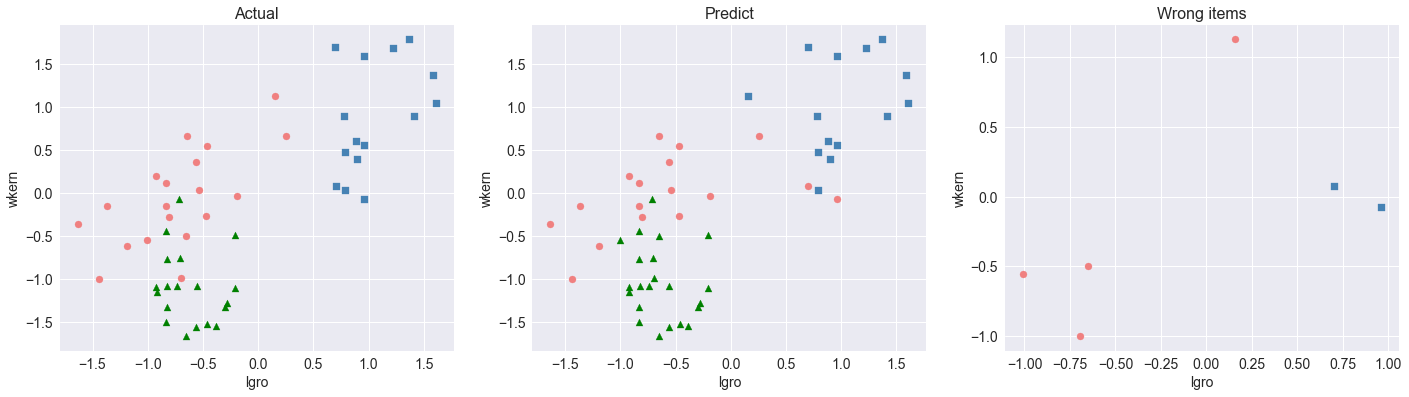

In [30]:
fig, axes = plt.subplots(1,3, figsize=(24,6))
def plot_3gr(ax,x,y):
    gr1 = y == 1
    gr2 = y == 2
    gr3 = y == 3
    ax.scatter(x[:, [5]][gr1], x[:, [3]][gr1], color='lightcoral', marker='o')
    ax.scatter(x[:, [5]][gr2], x[:, [3]][gr2], color='steelblue', marker='s')
    ax.scatter(x[:, [5]][gr3], x[:, [3]][gr3], color='green', marker='^')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.set_xlabel('lgro')
    ax.set_ylabel('wkern')
plot_3gr(axes[0],X_test,y_test)
axes[0].set_title('Actual')
plot_3gr(axes[1],X_test,y_predict)
axes[1].set_title('Predict')
plot_3gr(axes[2],X_test[~result],y_test[~result])
axes[2].set_title('Wrong items')
plt.show()

In [31]:
kn_classifier = KNeighborsClassifier(n_neighbors=4)
kn_classifier.fit(X_train, y_train)
y_predict = kn_classifier.predict(X_test)
result = y_test == y_predict
np.size(result) - np.count_nonzero(result)

5

In [32]:
kn_classifier = KNeighborsClassifier(n_neighbors=3)
kn_classifier.fit(X_train, y_train)
y_predict = kn_classifier.predict(X_test)
result = y_test == y_predict
np.size(result) - np.count_nonzero(result)

7

from above result we can choose $k=4$ as our final model.

## Random Forest classification

Random forest is an algorithms based on partitioning (not depend on distance.) So it does not require feature scaling. Even you done scaling, the result is same.  
Random forest is highly connected with decision tree, so in order to better understand random forest algorithms, need first understand what is decision tree.  

### Decision tree
As the name suggested, the decision tree uses a tree graph to help to make decision. Here are some terminologies:  

- **Root Nodes** It is the node present at the beginning of a decision tree from this node the population starts dividing according to various features.
- **Decision Nodes** the nodes we get after splitting the root nodes are called Decision Node
- __Leaf Nodes__ the nodes where further splitting is not possible are called leaf nodes or terminal nodes
- __Sub-tree__ just like a small portion of a graph is called sub-graph similarly a sub-section of this decision tree is called sub-tree.
- __Pruning__ is nothing but cutting down some nodes to stop overfitting.  

![decision tree](decision_tree.png)

Let's take a sample to better understand it. Here is a data table which makes decision:  
![decision data](data_decision.png)  
Here is a decision tree make same decision as the table:  
![decision tree sample](sample_tree.png)

Another question is when we have many features, which feature to select as the first to evaluate and which comes later? This actually has another idea which is "Entropy" and "Information Gain" helps to decide. Another one is "Gini impurity". Details regarding this you can try to find from any book or search from internet.  
Also regarding how to imporve efficiency and accuracy, avoid over-fitting, among others, please check from relevant books or articles.

### Random Forest
Let move back to random forest. This algorithms is to:  
1. Take from the training data set one subset which has k number of records. Total subsets are n.
2. Individual decision trees for each subset records are constructed.
3. Each decision tree will generate an output to do prediction.
4. Final output is considered based on Majority Voting or Averaging for Classification and regression respectively.  
![Random Forest](Random_Forest.jpg)

In [33]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(seeds_raw, labels, test_size=0.25)
rf_classifier = RandomForestClassifier()  # by defaul scikit-learn make 100 trees, and use gini-impurity
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
y_predict = rf_classifier.predict(X_test)
result = y_test == y_predict
result

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True])

In [35]:
np.size(result) - np.count_nonzero(result)

3

In [36]:
rf_classifier = RandomForestClassifier(criterion='entropy')
rf_classifier.fit(X_train, y_train)
y_predict = rf_classifier.predict(X_test)
result = y_test == y_predict
np.size(result) - np.count_nonzero(result)

3

Use entropy get a better result.

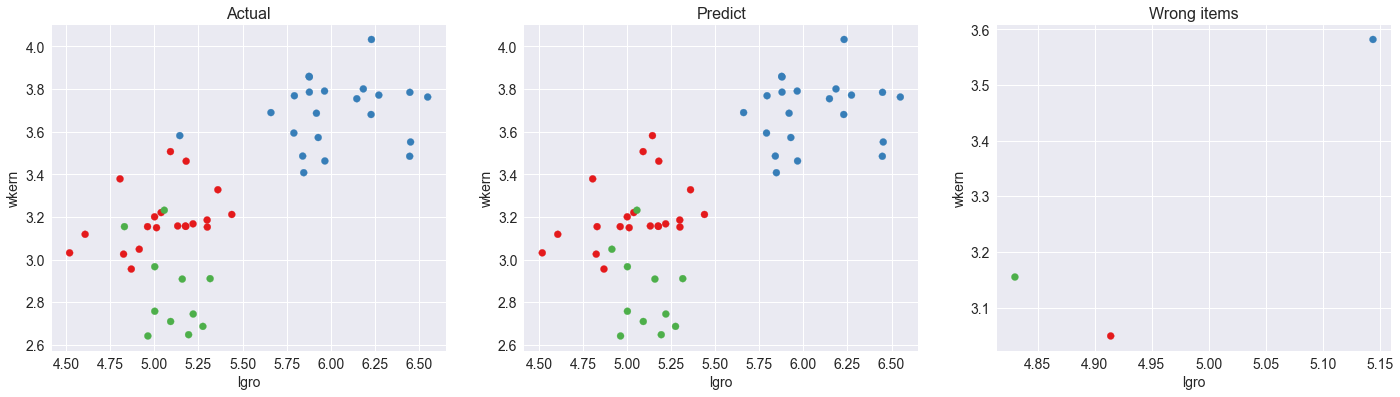

In [37]:
fig, axes = plt.subplots(1,3, figsize=(24,6))
def plot_3gr(ax,x,y):
    ax.scatter(x[:, [5]], x[:, [3]], c=y, cmap='Set1', vmin=1, vmax=9)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.set_xlabel('lgro')
    ax.set_ylabel('wkern')
plot_3gr(axes[0],X_test,y_test)
axes[0].set_title('Actual')
plot_3gr(axes[1],X_test,y_predict)
axes[1].set_title('Predict')
plot_3gr(axes[2],X_test[~result],y_test[~result])
axes[2].set_title('Wrong items')
plt.show()

[Text(397.575, 308.04, 'wkern <= 3.145\nentropy = 1.564\nsamples = 97\nvalue = [57, 40, 60]'),
 Text(251.10000000000002, 271.8, 'lgro <= 4.98\nentropy = 0.676\nsamples = 46\nvalue = [13, 0, 60]'),
 Text(167.4, 235.56, 'P <= 13.55\nentropy = 0.998\nsamples = 11\nvalue = [10, 0, 11]'),
 Text(125.55000000000001, 199.32000000000002, 'lgro <= 4.96\nentropy = 0.896\nsamples = 9\nvalue = [5, 0, 11]'),
 Text(83.7, 163.08, 'lgro <= 4.675\nentropy = 0.619\nsamples = 8\nvalue = [2, 0, 11]'),
 Text(41.85, 126.84, 'entropy = 0.0\nsamples = 1\nvalue = [2, 0, 0]'),
 Text(125.55000000000001, 126.84, 'entropy = 0.0\nsamples = 7\nvalue = [0, 0, 11]'),
 Text(167.4, 163.08, 'entropy = 0.0\nsamples = 1\nvalue = [3, 0, 0]'),
 Text(209.25, 199.32000000000002, 'entropy = 0.0\nsamples = 2\nvalue = [5, 0, 0]'),
 Text(334.8, 235.56, 'A <= 13.115\nentropy = 0.318\nsamples = 35\nvalue = [3, 0, 49]'),
 Text(292.95, 199.32000000000002, 'entropy = 0.0\nsamples = 30\nvalue = [0, 0, 44]'),
 Text(376.65000000000003, 199

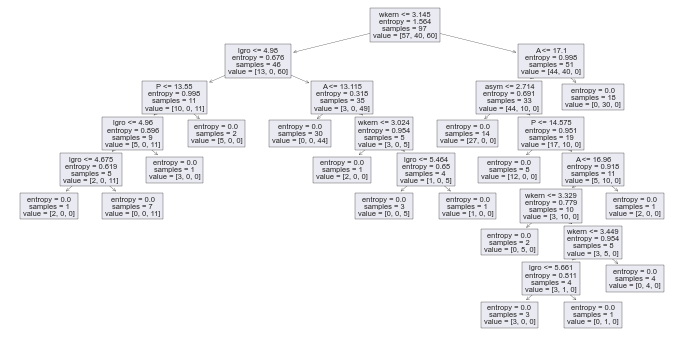

In [38]:
from sklearn.tree import plot_tree
# Pull out one tree from the forest
tree = rf_classifier.estimators_[0]
plot_tree(tree, feature_names = features)

In [39]:
!pip install pydot
# please also install graphviz software.

In [40]:
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf_classifier.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = features, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

![one tree](tree.png)

In [41]:
print(len(rf_classifier.estimators_))

100


In [42]:
rf_classifier.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1940033166),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=246209647),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1799651714),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1825968699),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=2063251941),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1702376951),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=2026995362),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=2072937602),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
       